In [268]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [269]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "num"
]

# Load the dataset
df = pd.read_csv(url, names=column_names)

print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


"num" It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  

In [271]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [273]:
"""ca = pd.Series(df["ca"])
thal = pd.Series(df["thal"])

for i,x in enumerate(ca):
    try:
        ca[i] = float(x)
    except:
        ca[i] = 0.0


for i,x in enumerate(thal):
    try:
        thal[i] = float(x)
    except:
        thal[i] = 0.0



df['ca'] = ca
df['thal'] = thal

df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)"""


df['ca'] = pd.to_numeric(df['ca'], errors='coerce').fillna(0.0)
df['thal'] = pd.to_numeric(df['thal'], errors='coerce').fillna(0.0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [274]:
from sklearn.linear_model import LogisticRegression
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [275]:
X = df.drop(columns = ['num'],axis = 1)
print(x)

3.0


In [276]:
y = df["num"]

In [277]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Create scaler
scaler = StandardScaler()
    
# Fit and transform
X_scaled_train = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)





# Initialize and train the model
model = LogisticRegression(max_iter = 1000000)

from sklearn.preprocessing import StandardScaler

model.fit(X_scaled_train, y_train)

LogisticRegression(max_iter=1000000)

In [278]:
y_pred = model.predict(X_test_scaled)

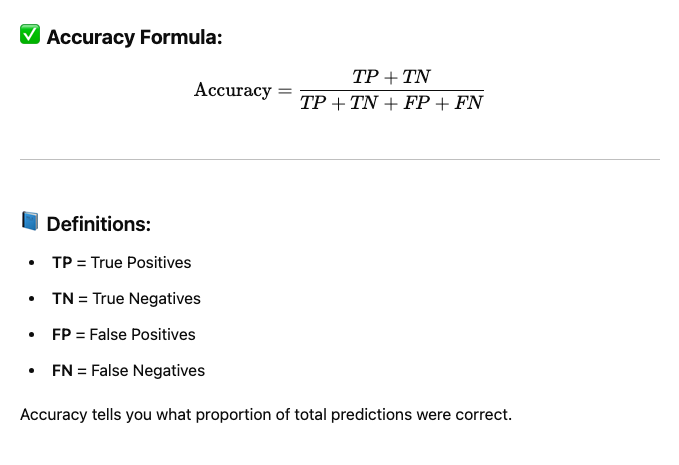

In [280]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5245901639344263


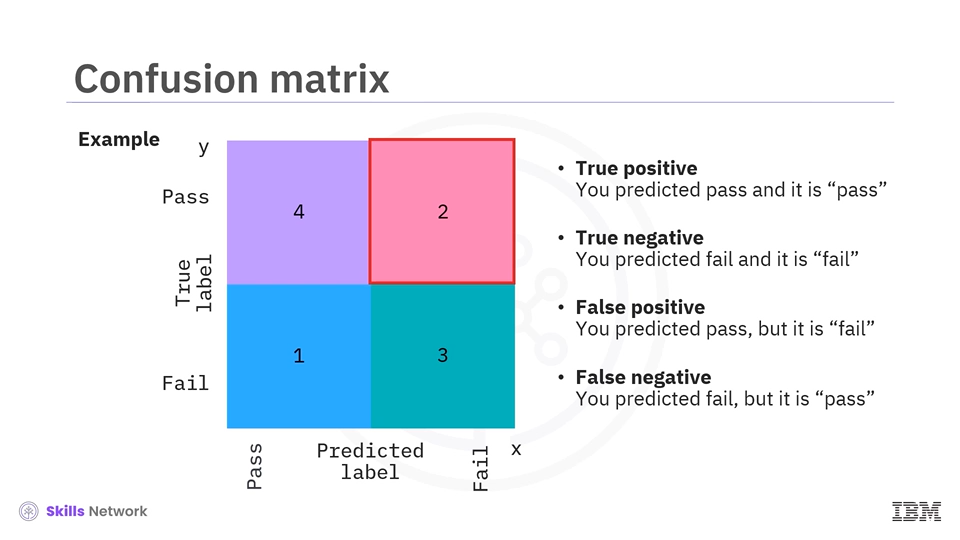

In [282]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[26  1  2  0  0]
 [ 4  2  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]


In [283]:
import plotly.express as px
from sklearn.metrics import confusion_matrix
import pandas as pd

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

fig = px.imshow(
    conf_matrix,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Confusion Matrix"
)

fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")
fig.show()

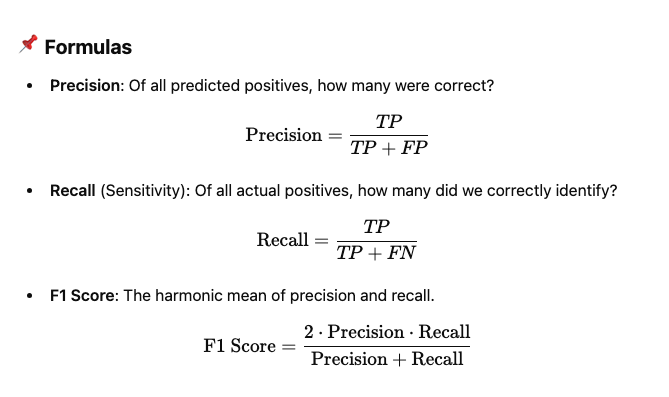

In [319]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)
f1 = f1_score(y_test, y_pred, average = None)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



That error happens because your target (y_true) has multiple classes, but the metric you're using (like precision_score) is set to average='binary', which only works for binary classification.

In [321]:
print("Precision:", precision,"\n")

print("Recall:", recall,"\n")

print("F1 Score:", f1,"\n")

Precision: [0.78787879 0.28571429 0.22222222 0.16666667 0.        ] 

Recall: [0.89655172 0.16666667 0.22222222 0.28571429 0.        ] 

F1 Score: [0.83870968 0.21052632 0.22222222 0.21052632 0.        ] 



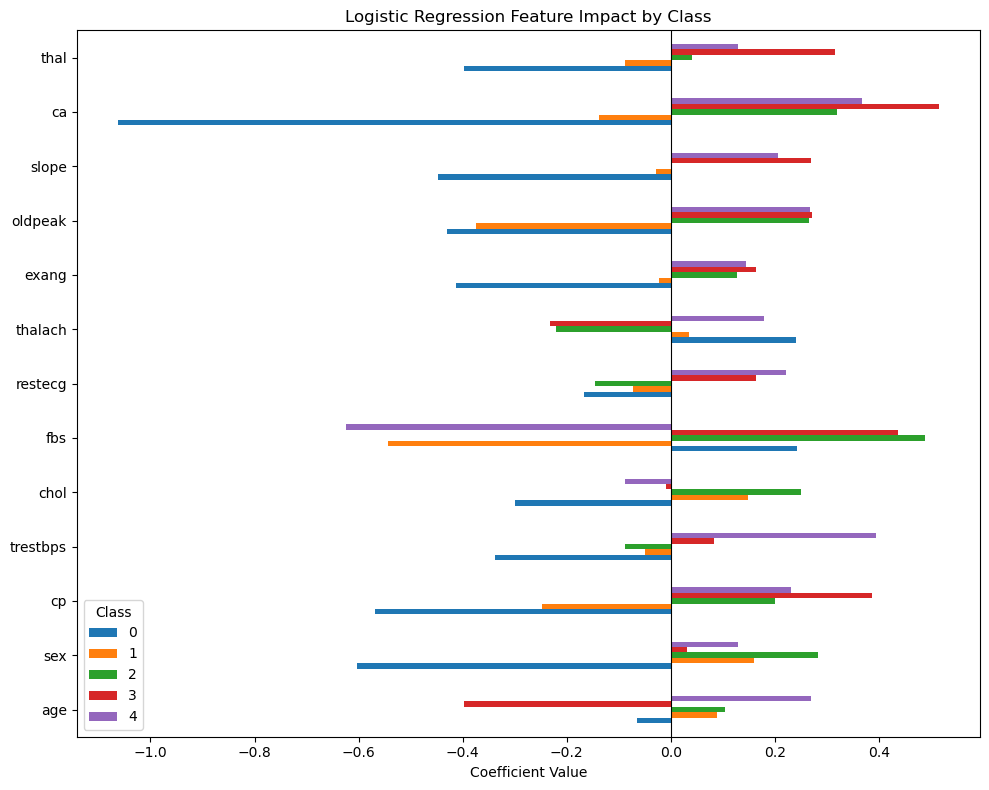

In [335]:

coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df['Class'] = model.classes_
coef_df = coef_df.set_index('Class').T  # transpose for better plotting


coef_df.plot(kind='barh', figsize=(10, 8))
plt.title('Logistic Regression Feature Impact by Class')
plt.xlabel('Coefficient Value')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()